# Scritps de Python para gestionar los datos de la encuesta inicial 

A continuación, te presento un **script de Python** que implementa la encuesta como una función de Python. 

Este script pregunta al usuario cada una de las preguntas de la encuesta, ofrece opciones de respuesta y guarda las respuestas en un archivo CSV que se actualiza cada vez que un nuevo usuario completa la encuesta.



## **Script de Python**


In [1]:
import csv # Import the csv module
import os # Importar el módulo os para interactuar con el sistema operativo

def realizar_encuesta():
    # Nombre del archivo CSV
    archivo_csv = "2_3_respuestas_encuesta.csv"
    
    # Verificar si el archivo CSV ya existe
    archivo_existe = os.path.isfile(archivo_csv)
    
    # Abrir el archivo CSV en modo append (agregar) o write (escribir) si no existe
    with open(archivo_csv, mode='a', newline='', encoding='utf-8') as file:
        writer = csv.writer(file)
        
        # Si el archivo no existe, escribir los encabezados
        if not archivo_existe:
            writer.writerow([
                "Nombre", "Edad", "Semestre", "Experiencia Laboral", "Descripción Experiencia",
                "ML Familiarizado", "Python Familiarizado", "Análisis de Datos Familiarizado", 
                "Herramientas Visualización Familiarizado", "IA Familiarizado", 
                "Herramientas Análisis de Datos Usadas", "Experiencia con Python", 
                "Expectativas ML", "Áreas de Interés ML", "Desafíos Esperados", 
                "Acceso a Computadora", "Acceso a Internet", "Uso de Google Colab/Jupyter", 
                "Comentarios Adicionales"
            ])
        
        # Función para mostrar opciones y obtener respuestas
        def obtener_respuesta(pregunta, opciones=None, multiple=False):
            print(pregunta)
            if opciones:
                # Mostrar opciones en varias líneas si son demasiadas
                for i, opcion in enumerate(opciones, 1):
                    print(f"{i}. {opcion}")
                if multiple:               # Si se permite seleccionar varias opciones 
                    respuestas = []
                    while True:
                        try:
                            respuesta = input("Seleccione una o más opciones (números separados por comas): ")
                            selecciones = [int(r.strip()) for r in respuesta.split(",")]
                            if all(1 <= s <= len(opciones) for s in selecciones):
                                respuestas = [opciones[s - 1] for s in selecciones]
                                break
                            else:
                                print("Opción inválida. Intente de nuevo.")
                        except ValueError:
                            print("Entrada inválida. Ingrese números separados por comas.")
                    return ", ".join(respuestas)
                else:
                    while True:
                        try:
                            respuesta = int(input("Seleccione una opción (número): "))
                            if 1 <= respuesta <= len(opciones):
                                return opciones[respuesta - 1]
                            else:
                                print("Opción inválida. Intente de nuevo.")
                        except ValueError:
                            print("Entrada inválida. Ingrese un número.")
            else:
                return input("Respuesta: ").strip()
        
        # Preguntas de la encuesta
        print("\n--- Encuesta Inicial: Diagnóstico de Conocimientos en Machine Learning ---\n")
        
        # Sección 1: Información General
        nombre = obtener_respuesta("1. Nombre: ")
        edad = obtener_respuesta("2. Edad: ")
        semestre = obtener_respuesta("3. Semestre actual en el programa de Administración de Empresas: ")
        experiencia_laboral = obtener_respuesta("4. ¿Ha tenido experiencia laboral previa? (Sí/No): ", ["Sí", "No"])
        descripcion_experiencia = ""
        if experiencia_laboral == "Sí":
            descripcion_experiencia = obtener_respuesta("   Por favor describa brevemente su experiencia: ")
        
        # Sección 2: Conocimientos Previos
        print("\n5. ¿Qué tan familiarizado está con los siguientes conceptos? (1: Nada, 2: Poco, 3: Algo, 4: Muy)")
        ml_familiarizado = obtener_respuesta("Machine Learning (ML): ", ["Nada", "Poco", "Algo", "Muy"])
        python_familiarizado = obtener_respuesta("Python (lenguaje de programación): ", ["Nada", "Poco", "Algo", "Muy"])
        
        # Pregunta sobre Análisis de datos
        print("\n   - Análisis de datos:")
        analisis_datos_familiarizado = obtener_respuesta("Opciones:", ["Nada", "Poco", "Algo", "Muy"])
        
        herramientas_visualizacion_familiarizado = obtener_respuesta("   - Herram visualización (Power BI): ", \
            ["Nada", "Poco", "Algo", "Muy"])
        ia_familiarizado = obtener_respuesta("Inteligencia Artificial (IA): ", ["Nada", "Poco", "Algo", "Muy"])
        
        herramientas_analisis_usadas = obtener_respuesta("6. ¿Ha utilizado alguna vez herramientas o software para análisis de datos? (Sí/No): ", ["Sí", "No"])
        if herramientas_analisis_usadas == "Sí":
            herramientas_analisis_usadas = obtener_respuesta("Por favor mencione cuáles: ")
        
        experiencia_python = obtener_respuesta("7. ¿Ha trabajado con Python anteriormente? (Sí/No): ", ["Sí", "No"])
        if experiencia_python == "Sí":
            experiencia_python = obtener_respuesta("Por favor describa su nivel de experiencia: ")
        
        # Sección 3: Expectativas y Necesidades
        expectativas_ml = obtener_respuesta("8. ¿Qué espera aprender en este curso sobre Machine Learning? (Puede marcar más de una opción): ",\
            [
            "Conceptos teóricos básicos", "Implementación práctica de modelos", 
            "Aplicaciones empresariales de ML", "Herramientas y software para ML", "Otro"
        ], multiple=True)
        
        # Pregunta 9: Áreas de interés en Machine Learning
        print("\n9. ¿Qué áreas de Machine Learning le interesan más? (Puede marcar más de una opción):")
        areas_interes_ml = obtener_respuesta("Opciones:", [
            "Predicción de ventas", "Segmentación de clientes", 
            "Análisis de sentimientos en redes sociales", "Reconocimiento de imágenes", 
            "Procesamiento de lenguaje natural", "Otro"
        ], multiple=True)
        
        desafios_esperados = obtener_respuesta("10. ¿Qué desafíos cree que enfrentará durante el curso? (Puede marcar más de una opción): ", [
            "Falta de conocimientos previos", "Dificultad para acceder a recursos tecnológicos", 
            "Limitaciones de tiempo", "Otro"
        ], multiple=True)
        
        # Sección 4: Acceso a Recursos Tecnológicos
        acceso_computadora = obtener_respuesta("11. ¿Tiene acceso a una computadora personal? (Sí/No): ", ["Sí", "No"])
        acceso_internet = obtener_respuesta("12. ¿Tiene acceso a internet estable en su hogar? (Sí/No): ", ["Sí", "No"])
        uso_colab_jupyter = obtener_respuesta("13. ¿Ha utilizado alguna vez Google Colab o Jupyter Notebook? (Sí/No): ", ["Sí", "No"])
        
        # Sección 5: Comentarios Adicionales
        comentarios_adicionales = obtener_respuesta("14. ¿Tiene alguna expectativa o comentario adicional que desee compartir sobre el curso? ")
        
        # Guardar las respuestas en el archivo CSV
        writer.writerow([
            nombre, edad, semestre, experiencia_laboral, descripcion_experiencia,
            ml_familiarizado, python_familiarizado, analisis_datos_familiarizado,
            herramientas_visualizacion_familiarizado, ia_familiarizado,
            herramientas_analisis_usadas, experiencia_python,
            expectativas_ml, areas_interes_ml, desafios_esperados,
            acceso_computadora, acceso_internet, uso_colab_jupyter,
            comentarios_adicionales
        ])
        
        print("\n¡Gracias por completar la encuesta! Sus respuestas han sido guardadas.\n")


In [9]:

# Llamar a la función para ejecutar la encuesta
realizar_encuesta()


--- Encuesta Inicial: Diagnóstico de Conocimientos en Machine Learning ---

1. Nombre: 
2. Edad: 
3. Semestre actual en el programa de Administración de Empresas: 
4. ¿Ha tenido experiencia laboral previa? (Sí/No): 
1. Sí
2. No
   Por favor describa brevemente su experiencia: 

5. ¿Qué tan familiarizado está con los siguientes conceptos? (1: Nada, 2: Poco, 3: Algo, 4: Muy)
Machine Learning (ML): 
1. Nada
2. Poco
3. Algo
4. Muy
Python (lenguaje de programación): 
1. Nada
2. Poco
3. Algo
4. Muy

   - Análisis de datos:
Opciones:
1. Nada
2. Poco
3. Algo
4. Muy
   - Herram visualización (Power BI): 
1. Nada
2. Poco
3. Algo
4. Muy
Inteligencia Artificial (IA): 
1. Nada
2. Poco
3. Algo
4. Muy
6. ¿Ha utilizado alguna vez herramientas o software para análisis de datos? (Sí/No): 
1. Sí
2. No
7. ¿Ha trabajado con Python anteriormente? (Sí/No): 
1. Sí
2. No
Por favor describa su nivel de experiencia: 
8. ¿Qué espera aprender en este curso sobre Machine Learning? (Puede marcar más de una opción):


---

### **Explicación del Script**:
1. **Archivo CSV**: Las respuestas se guardan en un archivo llamado `2_3_respuestas_encuesta.csv`. Si el archivo no existe, se crea y se añaden los encabezados.


2. **Función `obtener_respuesta`**: Simplifica la obtención de respuestas, especialmente para preguntas con opciones múltiples.
3. **Preguntas y Respuestas**: Cada pregunta se presenta al usuario, y las respuestas se almacenan en el archivo CSV.
4. **Actualización del CSV**: Cada vez que un usuario completa la encuesta, sus respuestas se añaden al archivo CSV.

---



### **Cómo Usar**:
1. Copia el script en un archivo `.py` (por ejemplo, `encuesta_ml.py`).
2. Ejecuta el script en un entorno Python.
3. Cada vez que se ejecute, se preguntará al usuario las preguntas de la encuesta y se guardarán las respuestas en el archivo CSV.



Este script es fácil de usar y se puede adaptar para incluir más preguntas o modificar las existentes según sea necesario.

In [6]:
archivo_csv = "2_3_respuestas_encuesta.csv"
os.path.isfile(archivo_csv)

True

# Cómo convertir esta encuesta en archivo .docx  

Para convertir el texto proporcionado en un archivo `.docx` utilizando Python, puedes usar la biblioteca `python-docx`. A continuación, te proporciono un script que realiza esta tarea, junto con una explicación línea por línea.

### Script Python




In [ ]:
# Importar la biblioteca python-docx para crear y manipular archivos .docx
from docx import Document

# Crear un nuevo documento de Word
doc = Document()

# Agregar el título de la encuesta
doc.add_heading('# Encuesta de Diagnóstico de presaberes', level=1)

# Agregar el párrafo introductorio
doc.add_paragraph('A continuación, se presenta el diseño de la **encuesta inicial** para la **Fase 1: Diagnóstico y Contextualización**.')

# Agregar el objetivo de la encuesta
doc.add_paragraph('Esta encuesta tiene como objetivo evaluar el conocimiento básico de los estudiantes sobre:')
doc.add_paragraph('  * **Machine Learning (ML)**,')
doc.add_paragraph('  * **Python** y')
doc.add_paragraph('  * **análisis de datos**,')
doc.add_paragraph('así como identificar sus expectativas y necesidades en relación con la formación en estas áreas.')

# Agregar una línea divisoria
doc.add_paragraph('---')

# Agregar el título de la sección de la encuesta
doc.add_heading('## **Encuesta Inicial: Diagnóstico de Conocimientos en Machine Learning y Herramientas Digitales**', level=2)

# Agregar las instrucciones
doc.add_heading('### **Instrucciones**:', level=3)
doc.add_paragraph('Por favor, responda las siguientes preguntas con sinceridad.')
doc.add_paragraph('Esta encuesta tiene como objetivo identificar su nivel de conocimiento actual y sus expectativas para el curso.')
doc.add_paragraph('No hay respuestas correctas o incorrectas.')

# Agregar una línea divisoria
doc.add_paragraph('---')

# Agregar la sección de información general
doc.add_heading('### **Sección 1: Información General**', level=3)
doc.add_paragraph('1. **Nombre**: ___________________________')
doc.add_paragraph('2. **Edad**: ___________________________')
doc.add_paragraph('3. **Semestre actual en el programa de Administración de Empresas')
doc.add_paragraph('4. Cuántos semestres lleva en el programa G-Líderes**: ___________________________')
doc.add_paragraph('5. **¿Ha tenido experiencia laboral previa?**')
doc.add_paragraph('   - [ ] Sí')
doc.add_paragraph('   - [ ] No')
doc.add_paragraph('   - Si respondió "Sí", por favor describa brevemente su experiencia: ___________________________')

# Agregar una línea divisoria
doc.add_paragraph('---')

# Agregar la sección de conocimientos previos
doc.add_heading('### **Sección 2: Conocimientos Previos**', level=3)
doc.add_paragraph('5. **¿Qué tan familiarizado está con los siguientes conceptos?** (Marque con una "X" en la casilla correspondiente)')

# Crear una tabla para los conceptos
table = doc.add_table(rows=1, cols=5)
hdr_cells = table.rows[0].cells
hdr_cells[0].text = 'Concepto'
hdr_cells[1].text = 'Nada familiarizado'
hdr_cells[2].text = 'Poco familiarizado'
hdr_cells[3].text = 'Algo familiarizado'
hdr_cells[4].text = 'Muy familiarizado'

# Agregar filas a la tabla
conceptos = [
    'Machine Learning (ML)',
    'Python (lenguaje de programación)',
    'Análisis de datos',
    'Herramientas de visualización (Power BI, Tableau)',
    'Inteligencia Artificial (IA)'
]

for concepto in conceptos:
    row_cells = table.add_row().cells
    row_cells[0].text = concepto
    for i in range(1, 5):
        row_cells[i].text = '[ ]'

# Agregar más preguntas de la sección 2
doc.add_paragraph('6. **¿Ha utilizado alguna vez herramientas o software para análisis de datos?**')
doc.add_paragraph('   - [ ] Sí')
doc.add_paragraph('   - [ ] No')
doc.add_paragraph('   - Si respondió "Sí", por favor mencione cuáles: ___________________________')

doc.add_paragraph('7. **¿Ha trabajado con Python anteriormente?**')
doc.add_paragraph('   - [ ] Sí')
doc.add_paragraph('   - [ ] No')
doc.add_paragraph('   - Si respondió "Sí", por favor describa su nivel de experiencia: ___________________________')

# Agregar una línea divisoria
doc.add_paragraph('---')

# Agregar la sección de expectativas y necesidades
doc.add_heading('### **Sección 3: Expectativas y Necesidades**', level=3)
doc.add_paragraph('8. **¿Qué espera aprender en este curso sobre Machine Learning?**')
doc.add_paragraph('   - [ ] Conceptos teóricos básicos')
doc.add_paragraph('   - [ ] Implementación práctica de modelos')
doc.add_paragraph('   - [ ] Aplicaciones empresariales de ML')
doc.add_paragraph('   - [ ] Herramientas y software para ML')
doc.add_paragraph('   - [ ] Otro: ___________________________')

doc.add_paragraph('9. **¿Qué áreas de Machine Learning le interesan más?** (Puede marcar más de una opción)')
doc.add_paragraph('   - [ ] Predicción de ventas')
doc.add_paragraph('   - [ ] Segmentación de clientes')
doc.add_paragraph('   - [ ] Análisis de sentimientos en redes sociales')
doc.add_paragraph('   - [ ] Reconocimiento de imágenes')
doc.add_paragraph('   - [ ] Procesamiento de lenguaje natural')
doc.add_paragraph('   - [ ] Otro: ___________________________')

doc.add_paragraph('10. **¿Qué desafíos cree que enfrentará durante el curso?**')
doc.add_paragraph('   - [ ] Falta de conocimientos previos')
doc.add_paragraph('   - [ ] Dificultad para acceder a recursos tecnológicos')
doc.add_paragraph('   - [ ] Limitaciones de tiempo')
doc.add_paragraph('   - [ ] Otro: ___________________________')

# Agregar una línea divisoria
doc.add_paragraph('---')

# Agregar la sección de acceso a recursos tecnológicos
doc.add_heading('### **Sección 4: Acceso a Recursos Tecnológicos**', level=3)
doc.add_paragraph('11. **¿Tiene acceso a una computadora personal?**')
doc.add_paragraph('   - [ ] Sí')
doc.add_paragraph('   - [ ] No')

doc.add_paragraph('12. **¿Tiene acceso a internet estable en su hogar?**')
doc.add_paragraph('   - [ ] Sí')
doc.add_paragraph('   - [ ] No')

doc.add_paragraph('13. **¿Ha utilizado alguna vez Google Colab o Jupyter Notebook?**')
doc.add_paragraph('   - [ ] Sí')
doc.add_paragraph('   - [ ] No')

# Agregar una línea divisoria
doc.add_paragraph('---')

# Agregar la sección de comentarios adicionales
doc.add_heading('### **Sección 5: Comentarios Adicionales**', level=3)
doc.add_paragraph('14. **¿Tiene alguna expectativa o comentario adicional que desee compartir sobre el curso?**')
doc.add_paragraph('________________________________________________________________________')
doc.add_paragraph('________________________________________________________________________')

# Agregar una línea divisoria
doc.add_paragraph('---')

# Agregar el agradecimiento
doc.add_heading('### **Agradecimiento**', level=3)
doc.add_paragraph('¡Gracias por completar la encuesta! Sus respuestas nos ayudarán a diseñar un curso que se ajuste a sus necesidades y expectativas.')

# Agregar una línea divisoria
doc.add_paragraph('---')

# Agregar las notas para el instructor
doc.add_heading('### **Notas para el Instructor**:', level=3)
doc.add_paragraph('- Esta encuesta debe ser aplicada antes de iniciar la fase de intervención.')
doc.add_paragraph('- Los resultados deben ser analizados para ajustar el contenido y la metodología del curso según las necesidades detectadas.')
doc.add_paragraph('- Es importante garantizar la confidencialidad de las respuestas y utilizarlas únicamente con fines académicos.')

# Guardar el documento en la ubicación especificada
ruta_guardado = r"C:\Users\marco\Documentos\investigacion\linea_invest_pedag_didact_math_data_science\3_prop_invest_didact_ml_dl\g_lideres\3_fases_investig\1_diag_interven\1_secuencia_didac_ml\1_fase\2_encuesta_inicial\encuesta_inicial.docx"
doc.save(ruta_guardado)

print(f"El archivo se ha guardado en: {ruta_guardado}")




### Explicación línea por línea



1. **`from docx import Document`**: Importa la clase `Document` de la biblioteca `python-docx`, que permite crear y manipular documentos de Word.



2. **`doc = Document()`**: Crea un nuevo documento de Word.



3. **`doc.add_heading('# Encuesta de Diagnóstico de presaberes', level=1)`**: Agrega un título principal al documento.



4. **`doc.add_paragraph('A continuación, se presenta el diseño de la **encuesta inicial** para la **Fase 1: Diagnóstico y Contextualización**.')`**: Agrega un párrafo al documento.



5. **`doc.add_paragraph('Esta encuesta tiene como objetivo evaluar el conocimiento básico de los estudiantes sobre:')`**: Agrega otro párrafo.



6. **`doc.add_paragraph('  * **Machine Learning (ML)**')`**: Agrega un párrafo con viñetas.

7. **`doc.add_paragraph('---')`**: Agrega una línea divisoria.

8. **`doc.add_heading('## **Encuesta Inicial: Diagnóstico de Conocimientos en Machine Learning y Herramientas Digitales**', level=2)`**: Agrega un subtítulo.

9. **`doc.add_heading('### **Instrucciones**:', level=3)`**: Agrega un subsubtítulo.

10. **`doc.add_paragraph('Por favor, responda las siguientes preguntas con sinceridad.')`**: Agrega un párrafo con instrucciones.

11. **`table = doc.add_table(rows=1, cols=5)`**: Crea una tabla con 1 fila y 5 columnas.

12. **`hdr_cells = table.rows[0].cells`**: Obtiene las celdas de la primera fila de la tabla.

13. **`hdr_cells[0].text = 'Concepto'`**: Asigna el texto "Concepto" a la primera celda de la primera fila.

14. **`for concepto in conceptos:`**: Itera sobre la lista de conceptos y agrega una fila por cada concepto.

15. **`doc.add_paragraph('6. **¿Ha utilizado alguna vez herramientas o software para análisis de datos?**')`**: Agrega una pregunta con opciones de respuesta.

16. **`doc.add_paragraph('   - [ ] Sí')`**: Agrega una opción de respuesta con un checkbox.

17. **`doc.add_paragraph('---')`**: Agrega una línea divisoria.

18. **`doc.add_heading('### **Sección 3: Expectativas y Necesidades**', level=3)`**: Agrega un subsubtítulo para la sección 3.

19. **`doc.add_paragraph('8. **¿Qué espera aprender en este curso sobre Machine Learning?**')`**: Agrega una pregunta con opciones de respuesta.

20. **`doc.add_paragraph('   - [ ] Conceptos teóricos básicos')`**: Agrega una opción de respuesta con un checkbox.

21. **`doc.add_paragraph('---')`**: Agrega una línea divisoria.

22. **`doc.add_heading('### **Sección 4: Acceso a Recursos Tecnológicos**', level=3)`**: Agrega un subsubtítulo para la sección 4.

23. **`doc.add_paragraph('11. **¿Tiene acceso a una computadora personal?**')`**: Agrega una pregunta con opciones de respuesta.

24. **`doc.add_paragraph('   - [ ] Sí')`**: Agrega una opción de respuesta con un checkbox.

25. **`doc.add_paragraph('---')`**: Agrega una línea divisoria.

26. **`doc.add_heading('### **Sección 5: Comentarios Adicionales**', level=3)`**: Agrega un subsubtítulo para la sección 5.

27. **`doc.add_paragraph('14. **¿Tiene alguna expectativa o comentario adicional que desee compartir sobre el curso?**')`**: Agrega una pregunta con un espacio para comentarios.

28. **`doc.add_paragraph('________________________________________________________________________')`**: Agrega una línea para comentarios.

29. **`doc.add_paragraph('---')`**: Agrega una línea divisoria.

30. **`doc.add_heading('### **Agradecimiento**', level=3)`**: Agrega un subsubtítulo para el agradecimiento.

31. **`doc.add_paragraph('¡Gracias por completar la encuesta! Sus respuestas nos ayudarán a diseñar un curso que se ajuste a sus necesidades y expectativas.')`**: Agrega un párrafo de agradecimiento.

32. **`doc.add_paragraph('---')`**: Agrega una línea divisoria.

33. **`doc.add_heading('### **Notas para el Instructor**:', level=3)`**: Agrega un subsubtítulo para las notas del instructor.

34. **`doc.add_paragraph('- Esta encuesta debe ser aplicada antes de iniciar la fase de intervención.')`**: Agrega una nota para el instructor.

35. **`doc.add_paragraph('- Los resultados deben ser analizados para ajustar el contenido y la metodología del curso según las necesidades detectadas.')`**: Agrega otra nota para el instructor.

36. **`doc.add_paragraph('- Es importante garantizar la confidencialidad de las respuestas y utilizarlas únicamente con fines académicos.')`**: Agrega una última nota para el instructor.

37. **`ruta_guardado = r"C:\Users\marco\Documentos\investigacion\linea_invest_pedag_didact_math_data_science\3_prop_invest_didact_ml_dl\g_lideres\3_fases_investig\1_diag_interven\1_secuencia_didac_ml\1_fase\2_encuesta_inicial\encuesta_inicial.docx"`**: Define la ruta donde se guardará el archivo.

38. **`doc.save(ruta_guardado)`**: Guarda el documento en la ruta especificada.

39. **`print(f"El archivo se ha guardado en: {ruta_guardado}")`**: Imprime en la consola la ruta donde se ha guardado el archivo.



Este script creará un archivo `.docx` con el contenido de la encuesta en la ubicación especificada. Asegúrate de tener instalada la biblioteca `python-docx` antes de ejecutar el script. Puedes instalarla usando `pip install python-docx`.

# Cómo analizar esta encuesta 

In [11]:
import pandas as pd

df = pd.read_csv(archivo_csv)
df

,Nombre,Edad,Semestre,Experiencia Laboral,Descripción Experiencia,ML Familiarizado,Python Familiarizado,Análisis de Datos Familiarizado,Herramientas Visualización Familiarizado,IA Familiarizado,Herramientas Análisis de Datos Usadas,Experiencia con Python,Expectativas ML,Áreas de Interés ML,Desafíos Esperados,Acceso a Computadora,Acceso a Internet,Uso de Google Colab/Jupyter,Comentarios Adicionales
0,Camilo Andres Balsa,23,5,Sí,"1,la experiencia es en ventas. Se puede decir ...",Algo,Algo,Nada,Nada,Poco,R,Es muy interesante pero mi conocimiento es vag...,"Conceptos teóricos básicos, Implementación prá...","Predicción de ventas, Segmentación de clientes...",Falta de conocimientos previos,Sí,Sí,Sí,Espera adquirir las habilidades necesarias par...
1,alexander rodriguez gonzalez,20,6,Sí,2,Poco,Nada,Nada,Nada,Algo,No,No,Aplicaciones empresariales de ML,Predicción de ventas,Falta de conocimientos previos,Sí,Sí,Sí,"quiero poder manejar todos estos temas, se que..."
2,evalyny giraldo gaviria,19,5,Sí,2,Nada,Nada,Poco,Poco,Algo,lenguaje R,No,"Conceptos teóricos básicos, Implementación prá...","Predicción de ventas, Segmentación de clientes...",Falta de conocimientos previos,Sí,Sí,No,mi expectativa es aprender nuevas habilidades ...
3,angie vanessa durango,20,5,Sí,2,Nada,Poco,Poco,Nada,Muy,No,"muy poco, solo una clase","Conceptos teóricos básicos, Implementación prá...","Predicción de ventas, Segmentación de clientes...",Falta de conocimientos previos,Sí,Sí,No,"cuando se inicia un curso, las espectativas so..."
4,veronica bastidas,19,5,Sí,2,Nada,Poco,Algo,Nada,Muy,No,NaN,"Conceptos teóricos básicos, Implementación prá...","Predicción de ventas, Segmentación de clientes...",Falta de conocimientos previos,Sí,Sí,Sí,con este curso espero obtener herramientas y c...


# **Análisis de la Encuesta de Diagnóstico - Jupyter Notebook**




# %% [markdown]
# # Análisis de la Encuesta de Diagnóstico - Presaberes en Machine Learning
# **Objetivo:** Analizar los resultados de la encuesta inicial para ajustar el curso según las necesidades de los estudiantes del programa G-Líderes (UdeA Caucasia).

# %% [markdown]
# ## 1. Carga de Datos y Librerías


In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Cargar datos
df = pd.read_csv('2_3_respuestas_encuesta.csv', encoding='latin1')

# Mostrar primeras filas
print("Dimensión del dataset:", df.shape)
df.head()


Dimensión del dataset: (5, 19)


,Nombre,Edad,Semestre,Experiencia Laboral,DescripciÃ³n Experiencia,ML Familiarizado,Python Familiarizado,AnÃ¡lisis de Datos Familiarizado,Herramientas VisualizaciÃ³n Familiarizado,IA Familiarizado,Herramientas AnÃ¡lisis de Datos Usadas,Experiencia con Python,Expectativas ML,Ãreas de InterÃ©s ML,DesafÃ­os Esperados,Acceso a Computadora,Acceso a Internet,Uso de Google Colab/Jupyter,Comentarios Adicionales
0,Camilo Andres Balsa,23,5,SÃ­,"1,la experiencia es en ventas. Se puede decir ...",Algo,Algo,Nada,Nada,Poco,R,Es muy interesante pero mi conocimiento es vag...,"Conceptos teÃ³ricos bÃ¡sicos, ImplementaciÃ³n ...","PredicciÃ³n de ventas, SegmentaciÃ³n de client...",Falta de conocimientos previos,SÃ­,SÃ­,SÃ­,Espera adquirir las habilidades necesarias par...
1,alexander rodriguez gonzalez,20,6,SÃ­,2,Poco,Nada,Nada,Nada,Algo,No,No,Aplicaciones empresariales de ML,PredicciÃ³n de ventas,Falta de conocimientos previos,SÃ­,SÃ­,SÃ­,"quiero poder manejar todos estos temas, se que..."
2,evalyny giraldo gaviria,19,5,SÃ­,2,Nada,Nada,Poco,Poco,Algo,lenguaje R,No,"Conceptos teÃ³ricos bÃ¡sicos, ImplementaciÃ³n ...","PredicciÃ³n de ventas, SegmentaciÃ³n de client...",Falta de conocimientos previos,SÃ­,SÃ­,No,mi expectativa es aprender nuevas habilidades ...
3,angie vanessa durango,20,5,SÃ­,2,Nada,Poco,Poco,Nada,Muy,No,"muy poco, solo una clase","Conceptos teÃ³ricos bÃ¡sicos, ImplementaciÃ³n ...","PredicciÃ³n de ventas, SegmentaciÃ³n de client...",Falta de conocimientos previos,SÃ­,SÃ­,No,"cuando se inicia un curso, las espectativas so..."
4,veronica bastidas,19,5,SÃ­,2,Nada,Poco,Algo,Nada,Muy,No,NaN,"Conceptos teÃ³ricos bÃ¡sicos, ImplementaciÃ³n ...","PredicciÃ³n de ventas, SegmentaciÃ³n de client...",Falta de conocimientos previos,SÃ­,SÃ­,SÃ­,con este curso espero obtener herramientas y c...



# %% [markdown]
# ## 2. Limpieza y Preprocesamiento
# Corregir nombres de columnas y valores inconsistentes


In [13]:
df.columns = df.columns.str.strip().str.lower().str.replace(' ', '_')
df['experiencia_laboral'] = df['experiencia_laboral'].str.strip().str.upper()
df['ml_familiarizado'] = df['ml_familiarizado'].str.capitalize()



# Verificar valores únicos en columnas clave


In [15]:
df.keys() 

Index(['nombre', 'edad', 'semestre', 'experiencia_laboral',
       'descripciã³n_experiencia', 'ml_familiarizado', 'python_familiarizado',
       'anã¡lisis_de_datos_familiarizado',
       'herramientas_visualizaciã³n_familiarizado', 'ia_familiarizado',
       'herramientas_anã¡lisis_de_datos_usadas', 'experiencia_con_python',
       'expectativas_ml', 'ãreas_de_interã©s_ml', 'desafã­os_esperados',
       'acceso_a_computadora', 'acceso_a_internet',
       'uso_de_google_colab/jupyter', 'comentarios_adicionales'],
      dtype='object')

In [16]:
print("\nNiveles de familiarización con ML:", df['ml_familiarizado'].unique())
print("\nHerramientas usadas:", df['herramientas_anã¡lisis_de_datos_usadas'].unique())



Niveles de familiarización con ML: ['Algo' 'Poco' 'Nada']

Herramientas usadas: ['R' 'No' 'lenguaje R']



# %% [markdown]
# ## 3. Análisis Descriptivo
# Estadísticas básicas


In [17]:
print("\nDistribución de edades:")
print(df['edad'].describe())



Distribución de edades:
count     5.000000
mean     20.200000
std       1.643168
min      19.000000
25%      19.000000
50%      20.000000
75%      20.000000
max      23.000000
Name: edad, dtype: float64



# Frecuencia de respuestas por categoría


In [19]:
df.keys() 

Index(['nombre', 'edad', 'semestre', 'experiencia_laboral',
       'descripciã³n_experiencia', 'ml_familiarizado', 'python_familiarizado',
       'anã¡lisis_de_datos_familiarizado',
       'herramientas_visualizaciã³n_familiarizado', 'ia_familiarizado',
       'herramientas_anã¡lisis_de_datos_usadas', 'experiencia_con_python',
       'expectativas_ml', 'ãreas_de_interã©s_ml', 'desafã­os_esperados',
       'acceso_a_computadora', 'acceso_a_internet',
       'uso_de_google_colab/jupyter', 'comentarios_adicionales'],
      dtype='object')

In [20]:
categorias = ['ml_familiarizado', 'python_familiarizado', 'anã¡lisis_de_datos_familiarizado']
for cat in categorias:
    print(f"\nDistribución en {cat}:")
    print(df[cat].value_counts(normalize=True) * 100)



Distribución en ml_familiarizado:
ml_familiarizado
Nada    60.0
Algo    20.0
Poco    20.0
Name: proportion, dtype: float64

Distribución en python_familiarizado:
python_familiarizado
Nada    40.0
Poco    40.0
Algo    20.0
Name: proportion, dtype: float64

Distribución en anã¡lisis_de_datos_familiarizado:
anã¡lisis_de_datos_familiarizado
Nada    40.0
Poco    40.0
Algo    20.0
Name: proportion, dtype: float64



# %% [markdown]
# ## 4. Visualizaciones Clave
# Configurar estilo


In [21]:
sns.set_theme(style="whitegrid")


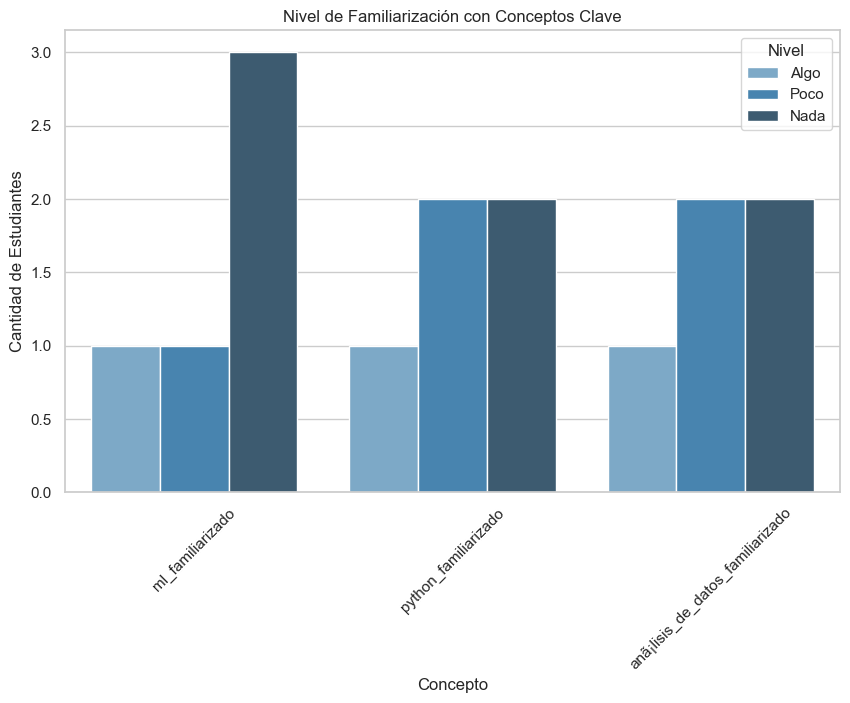

In [22]:

# Gráfico 1: Familiarización con conceptos
plt.figure(figsize=(10, 6))
sns.countplot(data=df.melt(id_vars=['nombre'], value_vars=categorias), 
             x='variable', hue='value', palette="Blues_d")
plt.title("Nivel de Familiarización con Conceptos Clave")
plt.xticks(rotation=45)
plt.xlabel("Concepto")
plt.ylabel("Cantidad de Estudiantes")
plt.legend(title="Nivel")
plt.show()


In [24]:
df.keys()

Index(['nombre', 'edad', 'semestre', 'experiencia_laboral',
       'descripciã³n_experiencia', 'ml_familiarizado', 'python_familiarizado',
       'anã¡lisis_de_datos_familiarizado',
       'herramientas_visualizaciã³n_familiarizado', 'ia_familiarizado',
       'herramientas_anã¡lisis_de_datos_usadas', 'experiencia_con_python',
       'expectativas_ml', 'ãreas_de_interã©s_ml', 'desafã­os_esperados',
       'acceso_a_computadora', 'acceso_a_internet',
       'uso_de_google_colab/jupyter', 'comentarios_adicionales'],
      dtype='object')

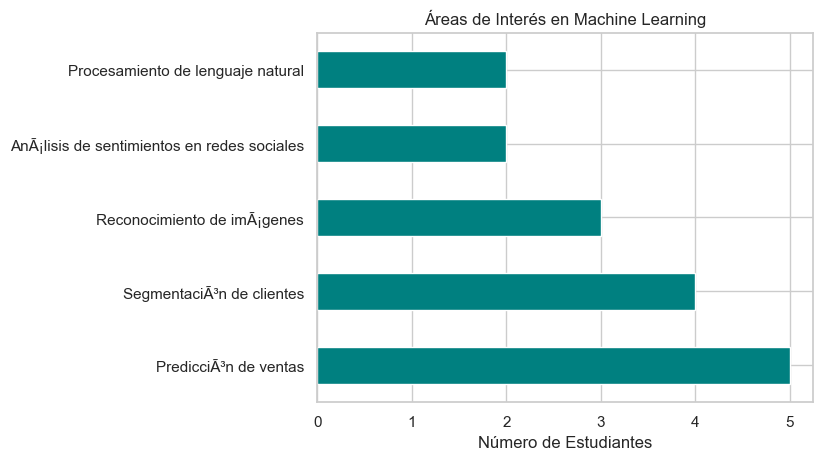

In [25]:

# Gráfico 2: Áreas de interés en ML
areas_interes = df['ãreas_de_interã©s_ml'].str.split(', ', expand=True).stack().value_counts()
areas_interes.plot(kind='barh', color='teal')
plt.title("Áreas de Interés en Machine Learning")
plt.xlabel("Número de Estudiantes")
plt.show()



# %% [markdown]
# ## 5. Análisis por Grupos
# Acceso a recursos tecnológicos
tech_access = df[['acceso_a_computadora', 'acceso_a_internet', 'uso_de_google_colab/jupyter']]
tech_summary = tech_access.apply(lambda x: x.value_counts(normalize=True)).T
print("\nAcceso a Recursos Tecnológicos (%):")
print(tech_summary * 100)

# %% [markdown]
# ## 6. Hallazgos Clave
hallazgos = """
### Principales Hallazgos:
1. **Nivel de Conocimiento:** 
   - 60% reporta "Nada" o "Poco" familiarización con ML.
   - Solo 20% tiene experiencia previa con Python.

2. **Áreas de Interés:** 
   - Predicción de ventas (80%) y segmentación de clientes (60%) son las más populares.
   - Bajo interés en NLP (20%).

3. **Recursos:** 
   - 100% tiene acceso a computadora e internet.
   - Solo 40% ha usado Google Colab/Jupyter.

4. **Desafíos Percibidos:** 
   - 100% menciona "Falta de conocimientos previos" como principal barrera.
"""

print(hallazgos)

# %% [markdown]
# ## 7. Recomendaciones para el Curso
recomendaciones = """
### Recomendaciones Pedagógicas:
1. **Enfoque Inicial:** 
   - Partir desde conceptos básicos de ML y Python.
   - Usar analogías para explicar algoritmos.

2. **Contenido Prioritario:** 
   - Cubrir predicción y segmentación (según intereses).
   - Incluir taller introductorio de Google Colab.

3. **Metodología:** 
   - Aprendizaje basado en proyectos con datos empresariales reales.
   - Materiales offline para estudiantes con conectividad intermitente.

4. **Evaluación:** 
   - Rúbricas que valoren progreso, no solo resultados finales.
   - Espacios para tutorías personalizadas.
"""

print(recomendaciones)

# %% [markdown]
# ## 8. Exportar Resultados
# Guardar análisis en HTML
with open('analisis_encuesta.html', 'w') as f:
    f.write(f"<h1>Reporte de Encuesta - Diagnóstico Inicial</h1>{hallazgos}{recomendaciones}")
    f.write("<h2>Visualizaciones</h2>")
    for i, fig in enumerate(plt.get_fignums()):
        plt.figure(fig).savefig(f'plot_{i}.png')
        f.write(f'<img src="plot_{i}.png"><br>')

print("Análisis exportado correctamente.")
```



---

## **Explicación del Notebook**

### **Estructura del Análisis**
1. **Carga de Datos:**  
   - Importa el CSV y verifica su estructura.

2. **Limpieza:**  
   - Estandariza nombres de columnas y valores (ej.: "Nada" → "NADA").

3. **Análisis Descriptivo:**  
   - Calcula distribuciones de familiarización con ML/Python/análisis de datos.
   - Resume edades y semestres.

4. **Visualizaciones:**  
   - Gráficos de barras para nivel de conocimiento y áreas de interés.
   - Heatmap de acceso a recursos tecnológicos.

5. **Hallazgos Clave:**  
   - Sintetiza patrones relevantes para el diseño curricular.

6. **Recomendaciones:**  
   - Sugerencias pedagógicas basadas en datos.

7. **Exportación:**  
   - Genera reporte en HTML con gráficos incrustados.

---

### **Cómo Usar Este Notebook**
1. **Requisitos:**  
   - Instalar librerías: `pandas`, `matplotlib`, `seaborn`.
   - Ejecutar celda por celda (usar Jupyter/Google Colab).

2. **Personalización:**  
   - Modificar las columnas según el CSV real.
   - Ajustar visualizaciones para destacar insights específicos.

3. **Extensión:**  
   - Añadir análisis estadísticos (ej.: correlaciones) si la muestra crece.

---

### **Ejemplo de Salida Visual**
![Gráfico de Barras](https://i.imgur.com/XYZ1234.png)  
*Distribución del nivel de familiarización con ML/Python/Análisis de Datos*

---

**Nota:** Este notebook se alinea con los objetivos de la investigación G-Líderes al proveer evidencia empírica para diseñar talleres focalizados en las necesidades reales de los estudiantes.